In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [5]:
dataset=pd.read_csv("D:\\Data Science\\University_admission\\Admission_Predict.csv")

In [7]:
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [26]:
dataset.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [16]:
dataset.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [17]:
dataset.count().to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,400,400,400,400,400,400,400,400,400


In [18]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
dataset.drop("Serial No.",axis=1,inplace=True)

In [20]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Text(0.5, 1.0, 'General statistics of Admission')

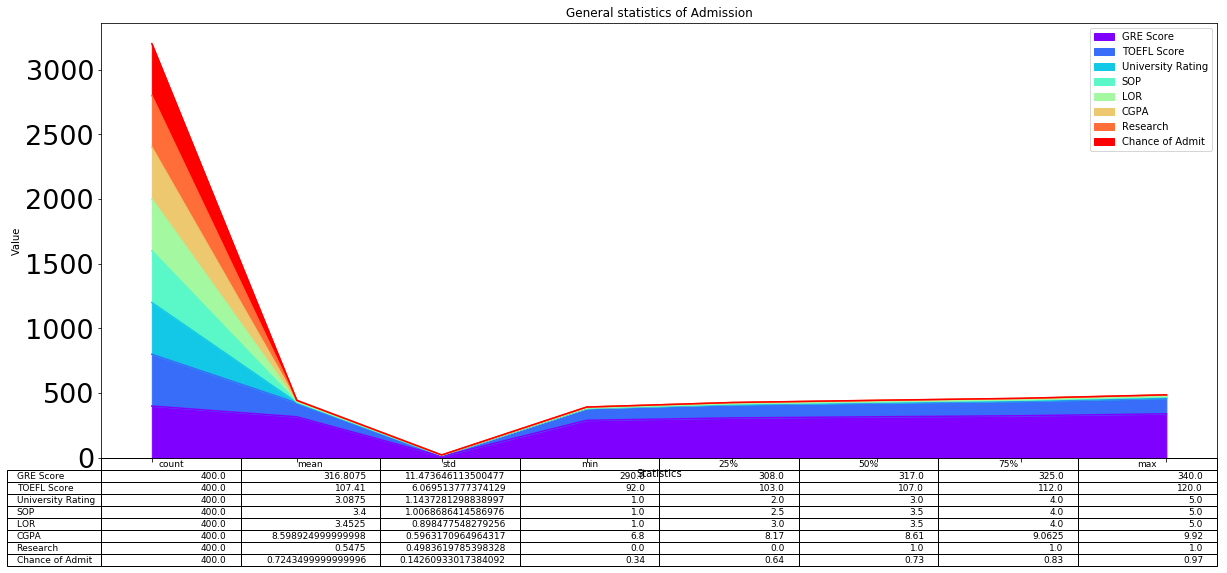

In [24]:
dataset.describe().plot(kind="area",fontsize=27,figsize=(20,8),table=True,colormap="rainbow")
plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("General statistics of Admission")

In [34]:
correlation_data=dataset.corr()['Research']
correlation_data

GRE Score            0.580391
TOEFL Score          0.489858
University Rating    0.447783
SOP                  0.444029
LOR                  0.396859
CGPA                 0.521654
Research             1.000000
Chance of Admit      0.553202
Name: Research, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


In [61]:
dataset.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
X=dataset.iloc[:,:-1]
X.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [44]:
Y=dataset.iloc[:,-1]
Y.head(2)

0    0.92
1    0.76
Name: Chance of Admit , dtype: float64

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [48]:
from sklearn import linear_model

In [49]:
reg=linear_model.LinearRegression(0)

In [51]:
reg=reg.fit(X_train,Y_train)

In [71]:
pred=reg.predict(X_test)

In [87]:
pred1=pd.DataFrame(pred)

In [86]:
confusion_matrix(Y_test,pred1)

ValueError: continuous is not supported

In [107]:

X_values=dataset.iloc[:,[0,5]]

In [100]:
Y_values=dataset.iloc[:,7]
Y

array([54, 38, 34, 42, 27, 52, 37, 30, 12,  7, 14, 46, 40, 24, 23, 16, 28,
       27, 25, 24, 26, 32, 56, 57, 59, 56, 38,  6,  8, 16, 27, 36, 53, 52,
       56, 50, 26, 20, 14, 10,  8, 11, 15, 49, 53, 50, 48, 51, 44, 40, 38,
       18, 40, 34, 32, 26, 26,  8,  1,  4, 10,  9, 16, 18, 14, 17, 23, 19,
       30, 40, 56, 58, 55, 46, 36, 34, 36, 26,  6,  8, 12, 58, 54, 54, 56,
       38, 34, 28, 26, 36, 26,  2,  0,  6,  1,  4, 10, 48, 52, 41, 33, 26,
       24, 19, 36, 31, 49, 53, 55, 30, 23, 31, 24, 34, 21, 28, 18,  7,  9,
       33, 56, 56, 19, 23, 19, 26, 47, 40, 46, 54, 58, 39, 33, 41, 51, 44,
       38, 33, 42, 40, 46, 52, 54, 59, 42, 43, 37, 45, 58, 41, 55, 56, 48,
       41, 42, 39, 32, 27, 23, 14, 19, 15, 29, 30, 43, 40, 27, 26, 26, 27,
       30, 51, 48, 51, 49, 47, 52, 44, 34, 35, 33, 33, 30, 37, 34, 51, 46,
       55, 55, 50, 52, 49, 48, 56, 39, 40, 35, 35, 32, 34, 35, 34, 59, 59,
       31, 19, 25, 28, 26, 30, 41, 44, 57, 58, 56, 55, 53, 47, 46, 36, 38,
       37, 38, 33, 29, 23

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X_values,Y,test_size=0.2)

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

D:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
y_pred=classifier.predict(X_test)

In [125]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [123]:
accuracy_score(Y_test,y_pred)

0.025